#### 로지스틱 회귀
 - 공부한 시간 데이터를 보고 합격여부를 예측  
 - 공부시간에 비례하여 점수를 부여  
 - 공부 1시간에 10점을 부여  
--> 선형 방정식  

- 합격점수(z) = w * 공부시간 + b  
- w(가중치) : 중요도  / 1시간당 점수(10점)   
- b(편향) : 기본점수(ex) -50, 5시간은 공부해야 0점이 된다)  

->  문제점 : 합격 점수에 해당하는 100점이 나올수도 있지만 -200점도 나올 수 있다.   
분류를 하려면 즉 합격, 불합격을 판단해야 하는데... 우리가 원하는 것은 방정식의 값으로 확률을 계산하는 것(0~100%)  

---
#### 점수를 확률로 바꿔야한다. (시그모이드 함수) 0~1 사이의 함수로 바꿔준다
 합격확률 = 시그모이드(z) = 1/ 1+ e^=z  
 합격점수가 높으면 1에 가깝고   
 낮으면 0에 가깝다  
 합격점수가 0이면 정확히 0.5(50%)  - 임계값  

---
#### 비용함수(손실함수) : 모델이 얼마나 틀렸는지 측정. 로지스틱은 로그함수를 사용
- 합격(정답=1)  
  - 모델이 99% 합격예측 => 벌점은 거의 0점  
  - 모델이 1% 합격예측 => 벌점은 크게 (무한대에 가깝게)  

- 불합격(정답 =0)  
  - 모델이 1%로 합격을 예측 -> 잘 맞춤 벌점이 거의 0점  
  - 모델이 99%로 합격을 예측 -> 완전틀림 벌점을 아주 크게  
---
#### log loss의 원리
w,b를 찾음... 손실함수를 이용해서 비용이 가장 낮을 때  

---
#### 비용이 최저인 값을 찾아나가는 방법 : 경사하강법
-> 학습이 너무 완벽한 모델이라는 문제  
--> 규제(regularization) 모델이 너무 복잡해지지 않도록 패널티 또는 단순함에 대한 보너스  
---> L2 규제(Ridge) : w(가중치)값이 너무 커지는 것을 막는다. 가중치 제곱의 합을 벌점으로 추가  
---> L1 규제(Lasso) : 어떤 특징이 별로 안 중요할 것 같은 것들의 가중치를 0으로 만든다.     
                      불필요한 특징을 제거하는 효과를 가지고 있음. 가중치들의 절대값의 합을 패널티로 추가 - feature selecter 역할도 한다  



In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)
clr = LogisticRegression(max_iter=10000)  # max_iter=10000 학습 반복 횟수 제한
clr.fit(x_train,y_train)
predict = clr.predict(x_test)
print(predict[:5], y_test[:5])
predict_proba = clr.predict_proba(x_test)       # predict_proba 각 클래스(0, 1)에 대한 확률값을 반환
predict_proba[:5]

[0 1 0 1 1] [0 1 0 1 1]


array([[9.99976592e-01, 2.34083250e-05],
       [4.40549309e-06, 9.99995595e-01],
       [9.99999996e-01, 3.53348269e-09],
       [1.26954049e-04, 9.99873046e-01],
       [4.13469443e-01, 5.86530557e-01]])

In [11]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# --- 시각화 함수 (공통) ---
def plot_decision_boundary(model, X_orig, y_orig, poly_transformer, scaler_transformer, title, subplot_ax):
    """모델의 결정 경계를 그려주는 함수"""
    # 1. 그래프를 그릴 영역을 정의합니다.
    x_min, x_max = X_orig[:, 0].min() - 0.5, X_orig[:, 0].max() + 0.5
    y_min, y_max = X_orig[:, 1].min() - 0.5, X_orig[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 2. 그래프 영역의 모든 점들을 모델이 예측할 수 있도록 변환합니다.
    grid_poly = poly_transformer.transform(np.c_[xx.ravel(), yy.ravel()])
    grid_scaled = scaler_transformer.transform(grid_poly)

    # 3. 변환된 점들을 모델로 예측합니다.
    Z = model.predict(grid_scaled)
    Z = Z.reshape(xx.shape)

    # 4. 결정 경계와 원본 데이터 포인트를 그립니다.
    subplot_ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    subplot_ax.scatter(X_orig[:, 0], X_orig[:, 1], c=y_orig, cmap=plt.cm.coolwarm, edgecolors='k')
    subplot_ax.set_title(title)
    subplot_ax.set_xlabel("Feature 1")
    subplot_ax.set_ylabel("Feature 2")

In [ ]:
# 과적합을 임의로 만들어서 시각화
# 1. 규제 알고리즘을 적용 
# 2. 모델을 경량화 -> 모델의 복잡도를 높이는 요소를 제거
# 3. 추가 데이터를 투입해서 학습

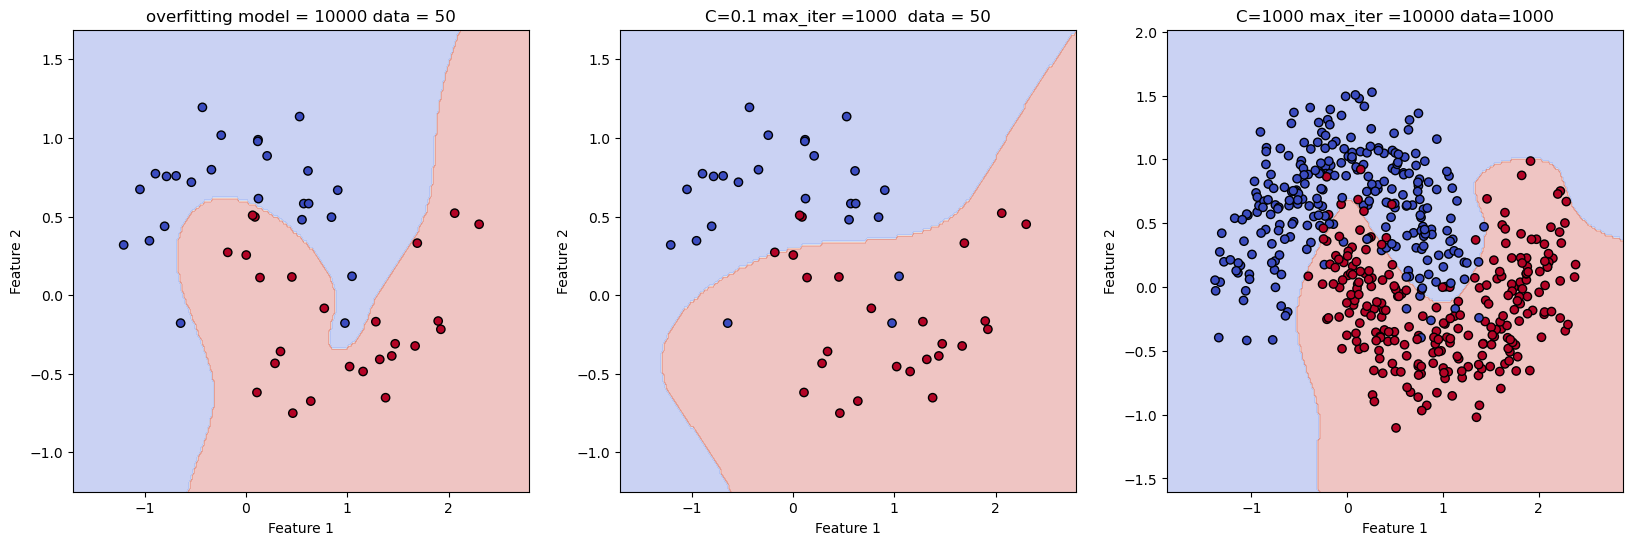

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(20,6))

# 과적합 모델
X_small, y_small = make_moons(n_samples=50,noise=0.25,random_state=45)
# 고차항 특성으로 변환(과적합 유도)
poly = PolynomialFeatures(degree=10, include_bias=False)
X_ploy_small = poly.fit_transform(X_small)
# 데이터 스케일링
scaler = StandardScaler()
X_scaled_small = scaler.fit_transform(X_ploy_small)
# 모덷 훈련
log_reg_overfit = LogisticRegression(C=1000,max_iter=10000)     # C가 규제강도. 클수록 규제를 약하게[/ max_iter 학습 횟수
log_reg_overfit.fit(X_scaled_small, y_small)
plot_decision_boundary(log_reg_overfit,X_small,y_small, poly,scaler, 'overfitting model = 10000 data = 50', axes[0])


# 규제적용(데이터 50, 강한 규제)
log_reg_regulation = LogisticRegression(C=0.1, max_iter=1000)
log_reg_regulation.fit(X_scaled_small, y_small)
plot_decision_boundary(log_reg_regulation,X_small,y_small, poly,scaler, 'C=0.1 max_iter =1000  data = 50', axes[1])


# 데이터를 추가 (데이터 500개추가)
X_large, y_large = make_moons(n_samples=500,noise=0.25,random_state=45)

# 고차항 특성으로 변환(과적합 유도)
poly = PolynomialFeatures(degree=10, include_bias=False)
X_ploy_large = poly.fit_transform(X_large)
# 데이터 스케일링
scaler = StandardScaler()
X_scaled_large = scaler.fit_transform(X_ploy_large)
# 모덷 훈련
log_reg_moredata = LogisticRegression(C=1000,max_iter=10000)     # C가 규제강도. 클수록 규제를 약하게[/ max_iter 학습 횟수
log_reg_moredata.fit(X_scaled_large, y_large)
plot_decision_boundary(log_reg_moredata,X_large,y_large, poly,scaler, 'C=1000 max_iter =10000 data=1000', axes[2])




In [72]:
# 파이프라인으로 적용

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=200, noise=0.25, random_state=42)

def load_make_moons(X,y):  
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

    pipe = Pipeline([
        ('poly', PolynomialFeatures()), 
        ('scaler', StandardScaler()),  
        ('regulartion',LogisticRegression())
    ])
    pipe.fit(X_train,y_train)
    pipeline_score = pipe.score(X_test,y_test)

    print(f'테스트 정확도 : {pipeline_score :.4f}')



In [73]:
load_make_moons(X, y)

테스트 정확도 : 0.8833


#### ROC, AUC
정확도 99% 지만 데이터가 불균형하다면 좋은 척도가 아님   
ROC와 AUC가 얼마나 안정적으로 좋은 성능을 내는지를 종합적으로 시각화  
모델이 예측한 확률을 기반으로 분류의 기준점(Threshold:임계점)을 계속 변경해서 모델의 성능이 어떻게 변화하는지 하나의 곡선으로 표현  

---
##### ROC 구성요소 TPR, FPR
- 혼동행렬 ( p: 1 n : 0)  p: 암환자 n : 정상  
  - TP : 진짜 암환자를 암이라고 예측 정답  
  - FN : 진짜 암환자를 정상으로 예측하여 틀림    
  - FP : 정상을 암으로 예측 잘못된 예측  
  - TN : 정상인 사람을 정상으로 예측 정답  

- ROC 곡선의 x와 y축을 담당  
  - y축 : 진짜를 얼마나 잘 찾았나 TPR(True Positive Rate) 실제 양성인 데이터 중에서 모델이 양성으로 올바르게 예측한 비율 
    - TPR : 민감도 또는 재현율 TP/TP+FN
  - x축 : 가짜를 얼마나 잘 찾았나 FPR
    - FPR : FP/FP+TN

   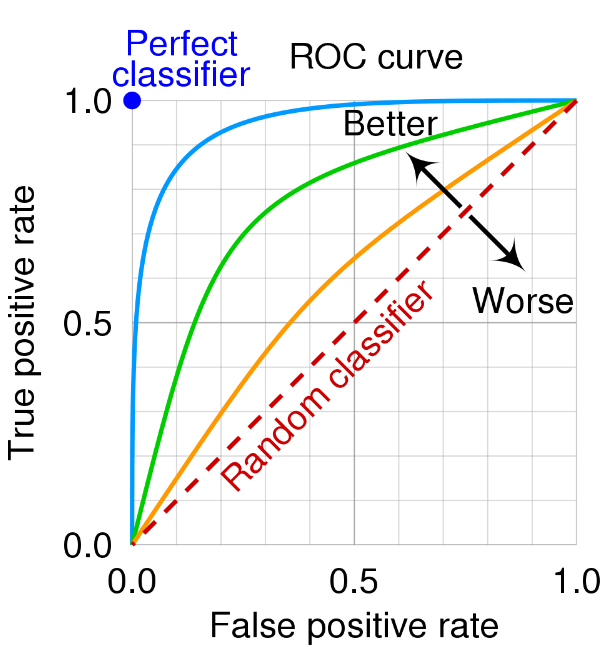

   ---
   #### AUC (Area Under The Curve)
Roc 곡선 아래의 면적
1 : 완벽한 모델 ROC가 좌측상단에 붙어 있는 모양
0.5 : 무작위로 찍는 것과 같은, 즉 랜덤하게 예측하는 수준
< 0.5 : 예측을 반대로.. 잘못된 모델

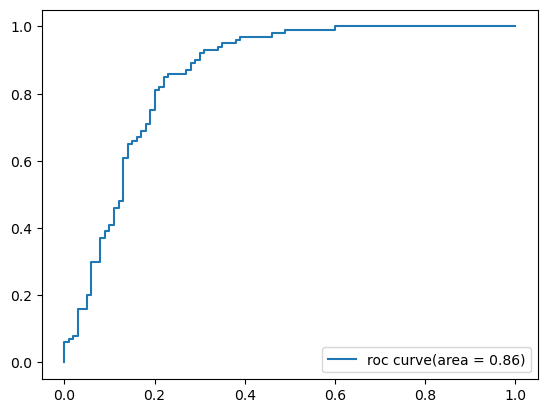

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       100
           1       0.80      0.81      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

X,y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=0, random_state= 42)
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_proba = model.predict_proba(X_test)[:,1]         # 왼쪽 0, 오른쪽 1 / 오른쪽이 1(양성)일때

# ROC AUC
# 실제값과 예측 확률 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
# fpr, tpr를 활용해 AUC를 계산
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr, label = f'roc curve(area = {roc_auc:.2f})')
plt.legend()
plt.show()

print(classification_report(y_test,model.predict(X_test)))